**Instrucciones**
La segunda tarea contempla las siguientes gráficas. Ustedes son libres de elegir la bilbioteca de Python que utilizarán (matplotlib, seaborn, plotly, plotly express, otras..)
Considere los siguientes datasets:
(A) gapminderData2.csv
(B) MigrantesChile (2005-2016).xlsx
(C) https://ciudadseva.com/texto/la-metamorfosis/

**Se entrega un Jupyter Notebook, más un PDF con el resultado de la ejecución, para cotejar en caso de problemas en la revisión.**

**Preprocesamiento**

In [ ]:
import numpy as np  
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import plotly

In [ ]:
# instalación de seaborn
#!conda install -c anaconda seaborn --yes

In [ ]:
# importamos biblioteca
import seaborn as sns


In [ ]:
data_gapminder = pd.read_csv('gapminderData2.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [ ]:
data_migrantes = pd.read_excel('MigrantesChile (2005-2016).xlsx')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


**1. A partir del dataset (A), obtenga un scatterplot que permita visualizar la relación entre PIB per Cápita y Nacimientos por Mujer, en el año 2007**

In [ ]:
data_gapminder2007 = data_gapminder.loc[data_gapminder['year'] == 2007]
data_gapminder2007.head()

country  year         pop continent   lifeExp     gdpPercap  \
11  Afghanistan  2007  31889923.0      Asia  43828.00    974.580338   
23      Albania  2007   3600523.0    Europe  76423.00   5937.029526   
35      Algeria  2007  33333216.0    Africa  72301.00   6223.367465   
47       Angola  2007  12420476.0    Africa  42731.00   4797.231267   
59    Argentina  2007  40301927.0  Americas     75.32  12779.379640   

    bornPerwom  
11        6.46  
23        1.67  
35        2.66  
47        6.37  
59        2.41

Text(0.5, 1.0, 'Nacimientos por Mujer vs PIB Per Cápita 2007')

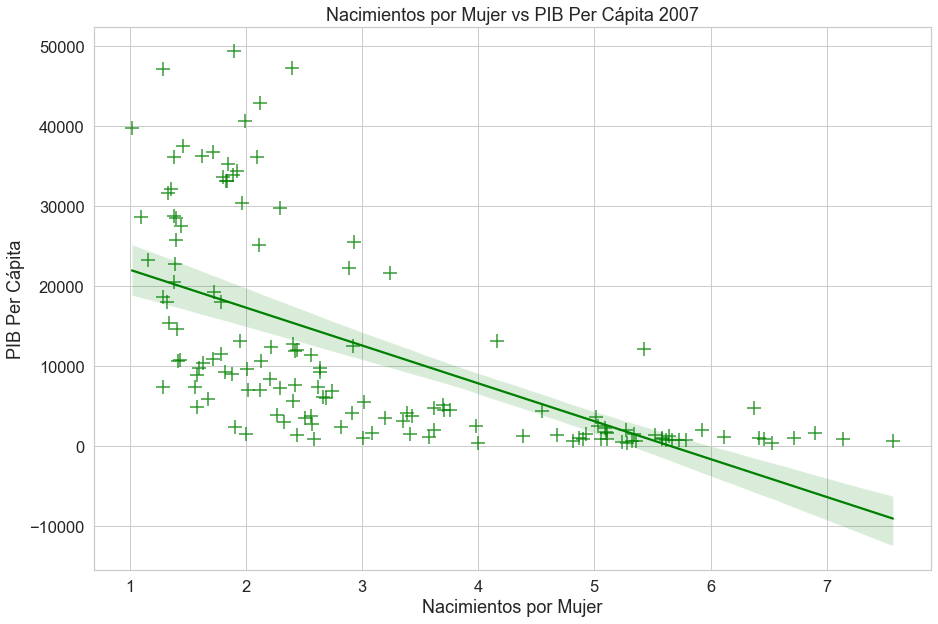

In [7]:
# preparamos la figura para scatterplot
plt.figure(figsize=(15, 10))

# tamaño de fuente y fondo
sns.set(font_scale=1.5)
sns.set_style('whitegrid') 

# generamos gráfico, título y etiquetas
ax = sns.regplot(x='bornPerwom', y='gdpPercap', data=data_gapminder2007, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Nacimientos por Mujer', ylabel='PIB Per Cápita')
ax.set_title('Nacimientos por Mujer vs PIB Per Cápita 2007')



**2. Transforme el gráfico anterior en un bubblechart, que considere la población de cada país como tamaño de la burbuja.**

Text(0.5, 1.0, 'Nacimientos por Mujer vs PIB Per Cápita 2007')

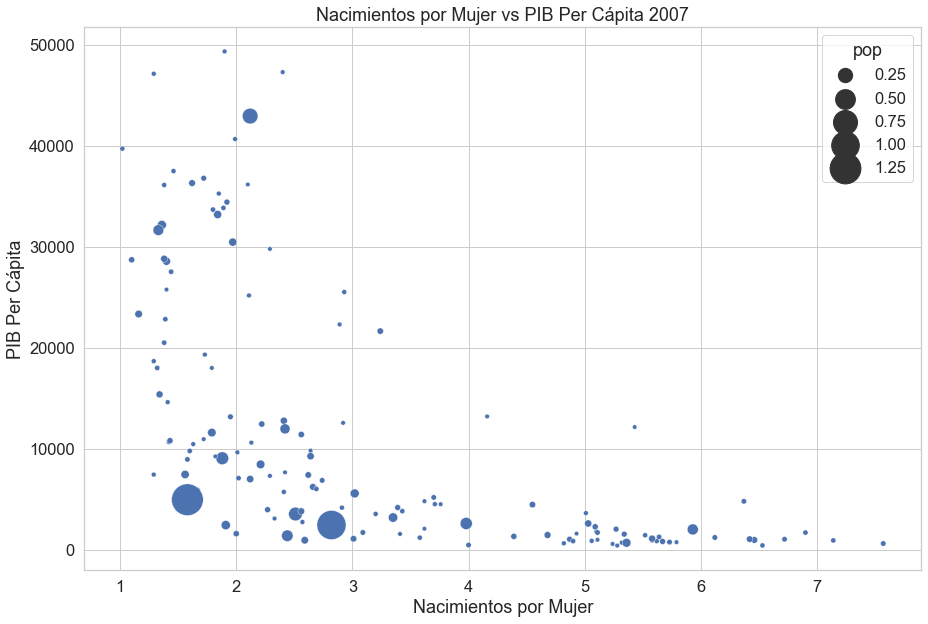

In [8]:
# transformamos el scatterplot anterior en un Bubble chart, añadiendo la dimensión de población pop
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid') 

ax = sns.scatterplot(x='bornPerwom', y='gdpPercap', size='pop', data=data_gapminder2007, sizes=(20, 1000))
ax.set(xlabel='Nacimientos por Mujer', ylabel='PIB Per Cápita')
ax.set_title('Nacimientos por Mujer vs PIB Per Cápita 2007')

**3. Realice una animación del bubblechart anterior en el tiempo, considerando todos los años del dataset (A)..**

In [9]:
#!conda install -c plotly plotly_express --yes

In [10]:
import plotly_express as px


In [11]:
px.scatter(data_gapminder, x="gdpPercap", y="bornPerwom", color="continent", size="pop", hover_name="country", animation_frame="year", animation_group="country", title= "Relación Ingreso per cápita vs Hijos nacidos por mujer (2007)", 
           labels={ "gdpPercap": "Ingreso Per Cápita",  "bornPerwom": "Nacimientos por Mujer"}, 
           log_x = True, 
           size_max=70, range_x=[100,100000], range_y=[1,10])


**4. Realice un Waffle Chart con el aporte de los países sudamericanos a la inmigración nacional, en un año determinado, a partir del dataset (B)**

In [12]:
data_migrantes.drop(['ID Continent','ID Country'], axis=1, inplace=True)
data_migrantes.head()

Continent      Country  2005  2006  2007  2008  2009  2010  2011  2012  \
0      Asia  Afghanistan     8     4     5     1     2     1     3     6   
1    Europe      Albania     2     1     1     2     2     5     3     2   
2    Europe      Germany   495   481   562   614   587   644   685   747   
3    Europe      Andorra     2     1     1     1     0     0     2     0   
4    Africa       Angola     1     2     4     3     2     4     6     8   

   2013  2014  2015  2016  
0    15     4    12    15  
1     1     2     7    11  
2   687   845   778   582  
3     1     2     2     1  
4     1     1    13    19

In [13]:
data_migrantes['Total'] = data_migrantes.sum(axis=1)
data_migrantes.head()

<ipython-input-13-aa3dfcd6b897>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Continent      Country  2005  2006  2007  2008  2009  2010  2011  2012  \
0      Asia  Afghanistan     8     4     5     1     2     1     3     6   
1    Europe      Albania     2     1     1     2     2     5     3     2   
2    Europe      Germany   495   481   562   614   587   644   685   747   
3    Europe      Andorra     2     1     1     1     0     0     2     0   
4    Africa       Angola     1     2     4     3     2     4     6     8   

   2013  2014  2015  2016  Total  
0    15     4    12    15     76  
1     1     2     7    11     39  
2   687   845   778   582   7707  
3     1     2     2     1     13  
4     1     1    13    19     64

In [14]:
data_migrantes.set_index('Country', inplace=True)
data_migrantes.head()

Continent  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
Country                                                                       
Afghanistan      Asia     8     4     5     1     2     1     3     6    15   
Albania        Europe     2     1     1     2     2     5     3     2     1   
Germany        Europe   495   481   562   614   587   644   685   747   687   
Andorra        Europe     2     1     1     1     0     0     2     0     1   
Angola         Africa     1     2     4     3     2     4     6     8     1   

             2014  2015  2016  Total  
Country                               
Afghanistan     4    12    15     76  
Albania         2     7    11     39  
Germany       845   778   582   7707  
Andorra         2     2     1     13  
Angola          1    13    19     64

In [15]:
america = data_migrantes[data_migrantes.Continent == "America"]
america = america.sort_values("Total", ascending=False)
america_1 = america[ : ]
america_1

Continent   2005   2006   2007   2008   2009  \
Country                                                                         
Peru                               America  25966  32746  63869  47336  56586   
Colombia                           America   2179   3195   4834   5563   7697   
Bolivia                            America   2420   2815   7448   5374   7801   
Argentina                          America   6263   6114   5656   5345   5453   
Ecuador                            America   2956   3135   4352   3933   4674   
Venezuela                          America    567    618    773    819   1013   
Haiti                              America     12     55    119    180    365   
United States                      America   1984   1926   2041   2377   2615   
Brazil                             America   1160   1451   1810   1641   1651   
Dominican Republic                 America    172    206    354    420    687   
Uruguay                            America   1077   1099   1275   1271   1171   
Mexico                             America    599    688    853    849    880   
Paraguay                           America    403    447    782    824    874   
Cuba                               America    664    642    736    706    732   
Canada                             America    272    246    243    294    266   
Panama                             America     72     89    161    305    322   
El Salvador                        America     55     53     79    113    115   
Costa Rica                         America     58     63     91     83     99   
Honduras                           America     44     41     74     84    147   
Guatemala                          America     57     60     64     98     98   
Nicaragua                          America     43     44     42     76     83   
Trinidad and Tobago                America      4      9     14     13      4   
Belize                             America      3      1      3      4      1   
Jamaica                            America      4      2      2      4      2   
Guyana                             America      0      3      2      4      2   
Saint Vincent and the Grenadines   America      1      3      3      4      2   
Bahamas                            America      1      0      2      1      0   
Suriname                           America      0      0      0      0      4   
Turks and Caicos Islands           America      0      0      0      0      4   
Saint Kitts and Nevis              America      0      0      0      0      0   
Grenada                            America      1      1      0      0      1   
Puerto Rico                        America      0      0      0      0      0   
Saint Lucia                        America      0      0      0      0      0   
Dominica                           America      1      0      0      0      0   
Bermuda                            America      0      0      0      1      0   
Antigua and Barbuda                America      0      0      0      1      0   

                                   2010   2011   2012   2013   2014   2015  \
Country                                                                      
Peru                              38048  40628  49643  48517  49900  59767   
Colombia                           8921  14362  20875  30138  33939  44535   
Bolivia                            7423   9189  17310  30611  34978  39126   
Argentina                          5387   5438   6548   7436   8326   9605   
Ecuador                            3624   3938   4679   4992   5309   6374   
Venezuela                          1091   1453   1760   2015   3557   9730   
Haiti                               744   1188   1948   2868   4407  10071   
United States                      3287   3425   3976   3749   3796   3413   
Brazil                             1818   1949   2426   2252   2405   3105   
Dominican Republic                 1152   1956   4655   4116   3603   3517   
Uruguay           

In [16]:
data_migrantes_4 = america_1.loc[['Peru', 'Colombia', 'Bolivia','Argentina', 'Ecuador', 'Brazil', 'Uruguay', 'Paraguay', 'Venezuela','Guyana', 'Suriname']]
data_migrantes_4 

Continent   2005   2006   2007   2008   2009   2010   2011   2012  \
Country                                                                       
Peru        America  25966  32746  63869  47336  56586  38048  40628  49643   
Colombia    America   2179   3195   4834   5563   7697   8921  14362  20875   
Bolivia     America   2420   2815   7448   5374   7801   7423   9189  17310   
Argentina   America   6263   6114   5656   5345   5453   5387   5438   6548   
Ecuador     America   2956   3135   4352   3933   4674   3624   3938   4679   
Brazil      America   1160   1451   1810   1641   1651   1818   1949   2426   
Uruguay     America   1077   1099   1275   1271   1171   1190   1075   1186   
Paraguay    America    403    447    782    824    874    889   1052   1286   
Venezuela   America    567    618    773    819   1013   1091   1453   1760   
Guyana      America      0      3      2      4      2      2      1      3   
Suriname    America      0      0      0      0      4      1      0      0   

            2013   2014   2015   2016   Total  
Country                                        
Peru       48517  49900  59767  53624  566630  
Colombia   30138  33939  44535  47352  223590  
Bolivia    30611  34978  39126  27852  192347  
Argentina   7436   8326   9605   8176   79747  
Ecuador     4992   5309   6374   7261   55227  
Brazil      2252   2405   3105   3276   24944  
Uruguay      956    957   1072    858   13187  
Paraguay    1331   1391   1556   1422   12257  
Venezuela   2015   3557   9730  26623   50019  
Guyana         3      3      0      0      23  
Suriname       0      0      5      4      14

In [17]:
data_migrantes_4.drop(['Continent'], axis=1, inplace=True)
data_migrantes_4.head()

2005   2006   2007   2008   2009   2010   2011   2012   2013  \
Country                                                                    
Peru       25966  32746  63869  47336  56586  38048  40628  49643  48517   
Colombia    2179   3195   4834   5563   7697   8921  14362  20875  30138   
Bolivia     2420   2815   7448   5374   7801   7423   9189  17310  30611   
Argentina   6263   6114   5656   5345   5453   5387   5438   6548   7436   
Ecuador     2956   3135   4352   3933   4674   3624   3938   4679   4992   

            2014   2015   2016   Total  
Country                                 
Peru       49900  59767  53624  566630  
Colombia   33939  44535  47352  223590  
Bolivia    34978  39126  27852  192347  
Argentina   8326   9605   8176   79747  
Ecuador     5309   6374   7261   55227

In [18]:
total = sum(data_migrantes_4 [2015])
#total_values = sum(df_pcb['Total'])

In [19]:
total


174875

In [20]:
proporcion_pais = [(float(value) / total) for value in data_migrantes_4[2015]]
# imprimir proporciones
for i, proportion in enumerate(proporcion_pais):
    print (data_migrantes_4 .index.values[i] + ': ' + str(proportion))

Peru: 0.3417698355968549
Colombia: 0.2546676197283774
Bolivia: 0.22373695496783416
Argentina: 0.05492494639027877
Ecuador: 0.03644889206576126
Brazil: 0.01775553967119371
Uruguay: 0.006130092923516798
Paraguay: 0.008897784131522516
Venezuela: 0.0556397426733381
Guyana: 0.0
Suriname: 2.8591851322373122e-05


In [21]:
width = 40
height=10
total_celdas= width * height
print ('Número total de celdas: ', total_celdas)

Número total de celdas:  400


In [22]:
# calcula la cantidad de celdas por categoría
tiles_per_category = [round(proportion * total_celdas) for proportion in proporcion_pais]

# imprime número de celdas por categoría
for i, tiles in enumerate(tiles_per_category):
    print (data_migrantes_4.index.values[i] + ': ' + str(tiles))

Peru: 137
Colombia: 102
Bolivia: 89
Argentina: 22
Ecuador: 15
Brazil: 7
Uruguay: 2
Paraguay: 4
Venezuela: 22
Guyana: 0
Suriname: 0


In [23]:
waffle = np.zeros((height, width))
category_index = 0
tile_index = 0
for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle[row, col] = category_index
                # Se asigna el valor de la categoría actual a las coordenadas row,col
        waffle[row, col] = category_index
        
print ('Waffle chart populated!')


Waffle chart populated!


In [24]:
waffle

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 4., 4., 5., 5., 6., 9., 9.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 4., 4., 5., 5., 6., 9., 9.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 4., 4., 5., 5., 7., 9., 9.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 4., 4., 5., 5., 7., 9., 9.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 4., 4., 5., 5., 8., 9., 9.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

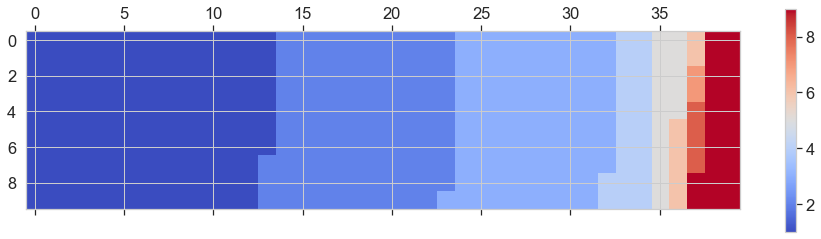

In [25]:
# se crea un nuevo objeto figura
fig = plt.figure()

# matwhow para desplegar el waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle, cmap=colormap)
plt.colorbar()

<Figure size 432x288 with 0 Axes>

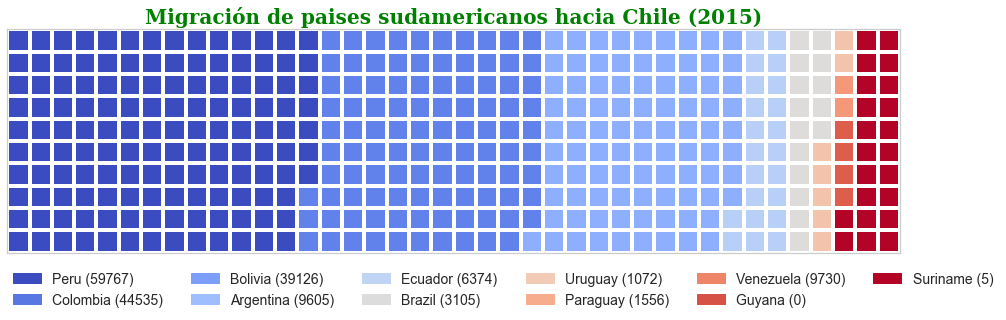

In [26]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle, cmap=colormap)


# se obtienen los ejes de la gráfica
ax = plt.gca()

# se setean los ticks menores de cada eje
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# se añaden líneas de grilla de acuerdo a los ticks menores
ax.grid(which='minor', color='w',  linewidth=4)

plt.xticks([])
plt.yticks([])

ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 



plt.title('Migración de paises sudamericanos hacia Chile (2015)', fontdict={'family': 'serif', 
                    'color' : 'green',
                    'weight': 'bold',
                    'size': 20})

# se crea leyenda
legend_handles = []
for i, category in enumerate(data_migrantes_4.index.values):
    label_str = category + ' (' + str(data_migrantes_4[2015][i]) + ')'
    color_val = colormap(float(i)/(data_migrantes_4.shape[0]-1))
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# se añade leyenda
plt.legend(handles=legend_handles,
           loc= (0, -0.7),
           ncol= 6,
           bbox_to_anchor=(0., -0.2, 0.95, .1),
           fontsize= 14, 
           framealpha= 0
          )

**5. Realice un Heat Map años versus los cinco países con más inmigrantes en total, para el dataset (B).**

In [27]:
data_migrantes_5= data_migrantes.sort_values("Total", ascending=False)
data_migrantes_5 [:5]


Continent   2005   2006   2007   2008   2009   2010   2011   2012  \
Country                                                                       
Peru        America  25966  32746  63869  47336  56586  38048  40628  49643   
Colombia    America   2179   3195   4834   5563   7697   8921  14362  20875   
Bolivia     America   2420   2815   7448   5374   7801   7423   9189  17310   
Argentina   America   6263   6114   5656   5345   5453   5387   5438   6548   
Ecuador     America   2956   3135   4352   3933   4674   3624   3938   4679   

            2013   2014   2015   2016   Total  
Country                                        
Peru       48517  49900  59767  53624  566630  
Colombia   30138  33939  44535  47352  223590  
Bolivia    30611  34978  39126  27852  192347  
Argentina   7436   8326   9605   8176   79747  
Ecuador     4992   5309   6374   7261   55227

In [28]:
data_migrantes_5.drop([ "Continent", "Total"], axis=1, inplace=True)
data_migrantes_5.head()

2005   2006   2007   2008   2009   2010   2011   2012   2013  \
Country                                                                    
Peru       25966  32746  63869  47336  56586  38048  40628  49643  48517   
Colombia    2179   3195   4834   5563   7697   8921  14362  20875  30138   
Bolivia     2420   2815   7448   5374   7801   7423   9189  17310  30611   
Argentina   6263   6114   5656   5345   5453   5387   5438   6548   7436   
Ecuador     2956   3135   4352   3933   4674   3624   3938   4679   4992   

            2014   2015   2016  
Country                         
Peru       49900  59767  53624  
Colombia   33939  44535  47352  
Bolivia    34978  39126  27852  
Argentina   8326   9605   8176  
Ecuador     5309   6374   7261

In [29]:
pregunta_5= data_migrantes_5.loc[['Peru', 'Colombia', 'Bolivia','Argentina', 'Ecuador' ]]
pregunta_5.head()

2005   2006   2007   2008   2009   2010   2011   2012   2013  \
Country                                                                    
Peru       25966  32746  63869  47336  56586  38048  40628  49643  48517   
Colombia    2179   3195   4834   5563   7697   8921  14362  20875  30138   
Bolivia     2420   2815   7448   5374   7801   7423   9189  17310  30611   
Argentina   6263   6114   5656   5345   5453   5387   5438   6548   7436   
Ecuador     2956   3135   4352   3933   4674   3624   3938   4679   4992   

            2014   2015   2016  
Country                         
Peru       49900  59767  53624  
Colombia   33939  44535  47352  
Bolivia    34978  39126  27852  
Argentina   8326   9605   8176  
Ecuador     5309   6374   7261

Text(97.421875, 0.5, 'Países')

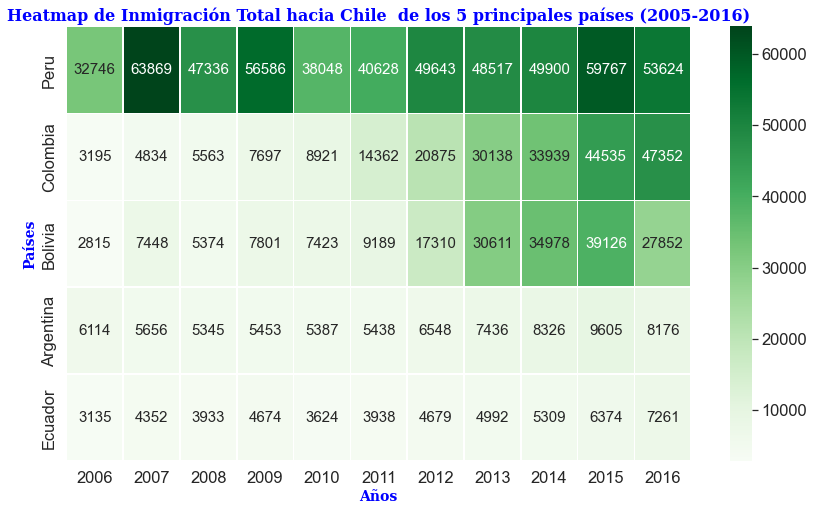

In [30]:
import seaborn as sns
fig = plt.figure(figsize=(14,8))
r = sns.heatmap(pregunta_5.iloc[:, 1:17:], 
                annot=True, #valores en las celdas 
                annot_kws={'size': 15},
                fmt=".0f", #formato de valor en las celdas
                linewidths=.7,
                cmap='Greens') #mapa de colores, otros: Blues, BuPu, Greens

r.set_title("Heatmap de Inmigración Total hacia Chile  de los 5 principales países (2005-2016)", fontdict={'family': 'serif', 
                    'color' : 'blue',
                    'weight': 'bold',
                    'size': 16})

plt.xlabel('Años', fontdict={'family': 'serif', 
                    'color' : 'blue',
                    'weight': 'bold',
                    'size': 14})
        
plt.ylabel('Países', fontdict={'family': 'serif', 
                    'color' : 'blue',
                    'weight': 'bold',
                    'size': 14})



In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [32]:
fig = plt.figure(figsize=(14,8))
r = sns.heatmap(pregunta_5.iloc[:, 1:17:], 
                annot=True, #valores en las celdas 
                annot_kws={'size': 15},
                fmt=".0f", #formato de valor en las celdas
                linewidths=.7,
                hover_data
                cmap='Greens') #mapa de colores, otros: Blues, BuPu, Greens

r.set_title("Heatmap de Inmigración Total hacia Chile  de los 5 principales países (2005-2016)", fontdict={'family': 'serif', 
                    'color' : 'blue',
                    'weight': 'bold',
                    'size': 16})

plt.xlabel('Años', fontdict={'family': 'serif', 
                    'color' : 'blue',
                    'weight': 'bold',
                    'size': 14})
        
plt.ylabel('Países', fontdict={'family': 'serif', 
                    'color' : 'blue',
                    'weight': 'bold',
                    'size': 14})

r.update_traces(
    hovertemplate='<br>'.join([
        'Bill $: %{x}',
        'Tip $: %{y}',
        'Size: %{z}',
        'Smokes: %{customdata[0]}'
    ])
)

SyntaxError: invalid syntax (<ipython-input-32-a747469be195>, line 8)

**6. Con el dataset (C), realice un Word Cloud del libro "La Metamorfosis", de Franz Kafka. Excluya palabras destacadas que no correspondan a verbos, adjetivos o sustantivos**

In [33]:
# instala wordcloud
#!conda install -c conda-forge wordcloud --yes


In [34]:
# importa paquete y el conjunto de stopwords
from wordcloud import WordCloud, STOPWORDS

In [35]:
# abre un archivo y lo lee en la variable alice_novel
Metamorfosis_K = open('Metamorfosis_T2.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


In [36]:
stopwords = set(STOPWORDS)

In [37]:
# instanciamos un objeto wordcloud
Metamorfosis = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generamos la word cloud
Metamorfosis.generate(Metamorfosis_K)

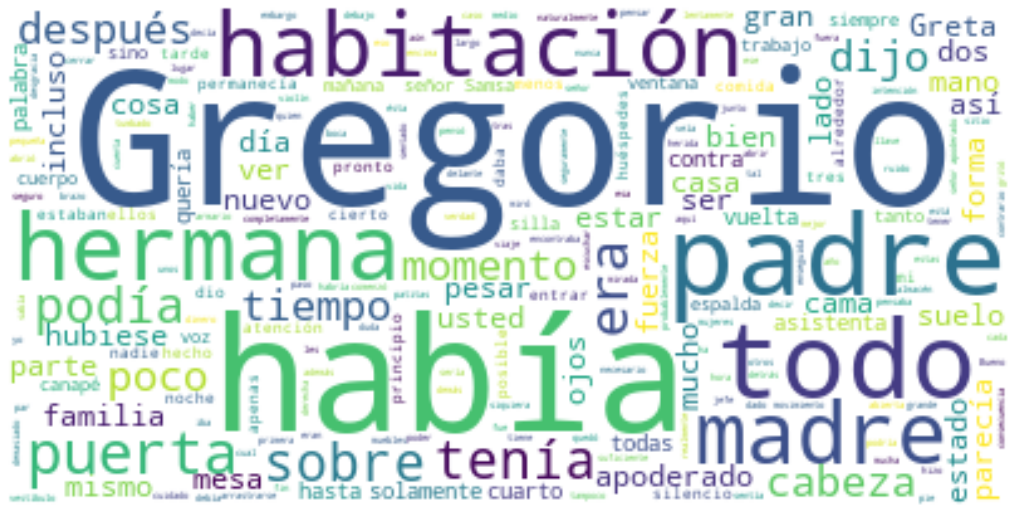

In [38]:
#stopwords.add("y")# añadimos la palabra "said" al conjunto de stopwords
#stopwords.add("que", "se")

stopwords|= {"que","y", "se", "en", "de", "la", "para", "con", "su", "el", "por", "una", "las", "los", "del", "le", "al", "ya", "lo", "él", "sus", "ello", "esta", "también", "sí", "más", "este", "vez","toda","antes","uno", "otro",
            "e", "su", "si", "como", "por que", "ahora", "allí", "un", "ella","estaba", "es", "desde", "porque", "muy", "sin", "pero", "cuando", "hacia", "hacía", "Qué", "ante", "cómo", "entre", "nada", "delante"
           "después", "quizá", "mientras", "todavía","esto","habían", "tan", "durante", "casi", "algo", "inmediatamente", "entonces","alguna", "hacer", "sólo", "sido", "otra", "o", "ni", "veces"}

# regeneramos la word cloud
Metamorfosis.generate(Metamorfosis_K)

# desplegamos la word cloud
fig = plt.figure()
fig.set_figwidth(18) 
fig.set_figheight(18) 

plt.imshow(Metamorfosis, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
from PIL import Image

In [40]:
Gregorio_mask = np.array(Image.open('Metamorfosis 3.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


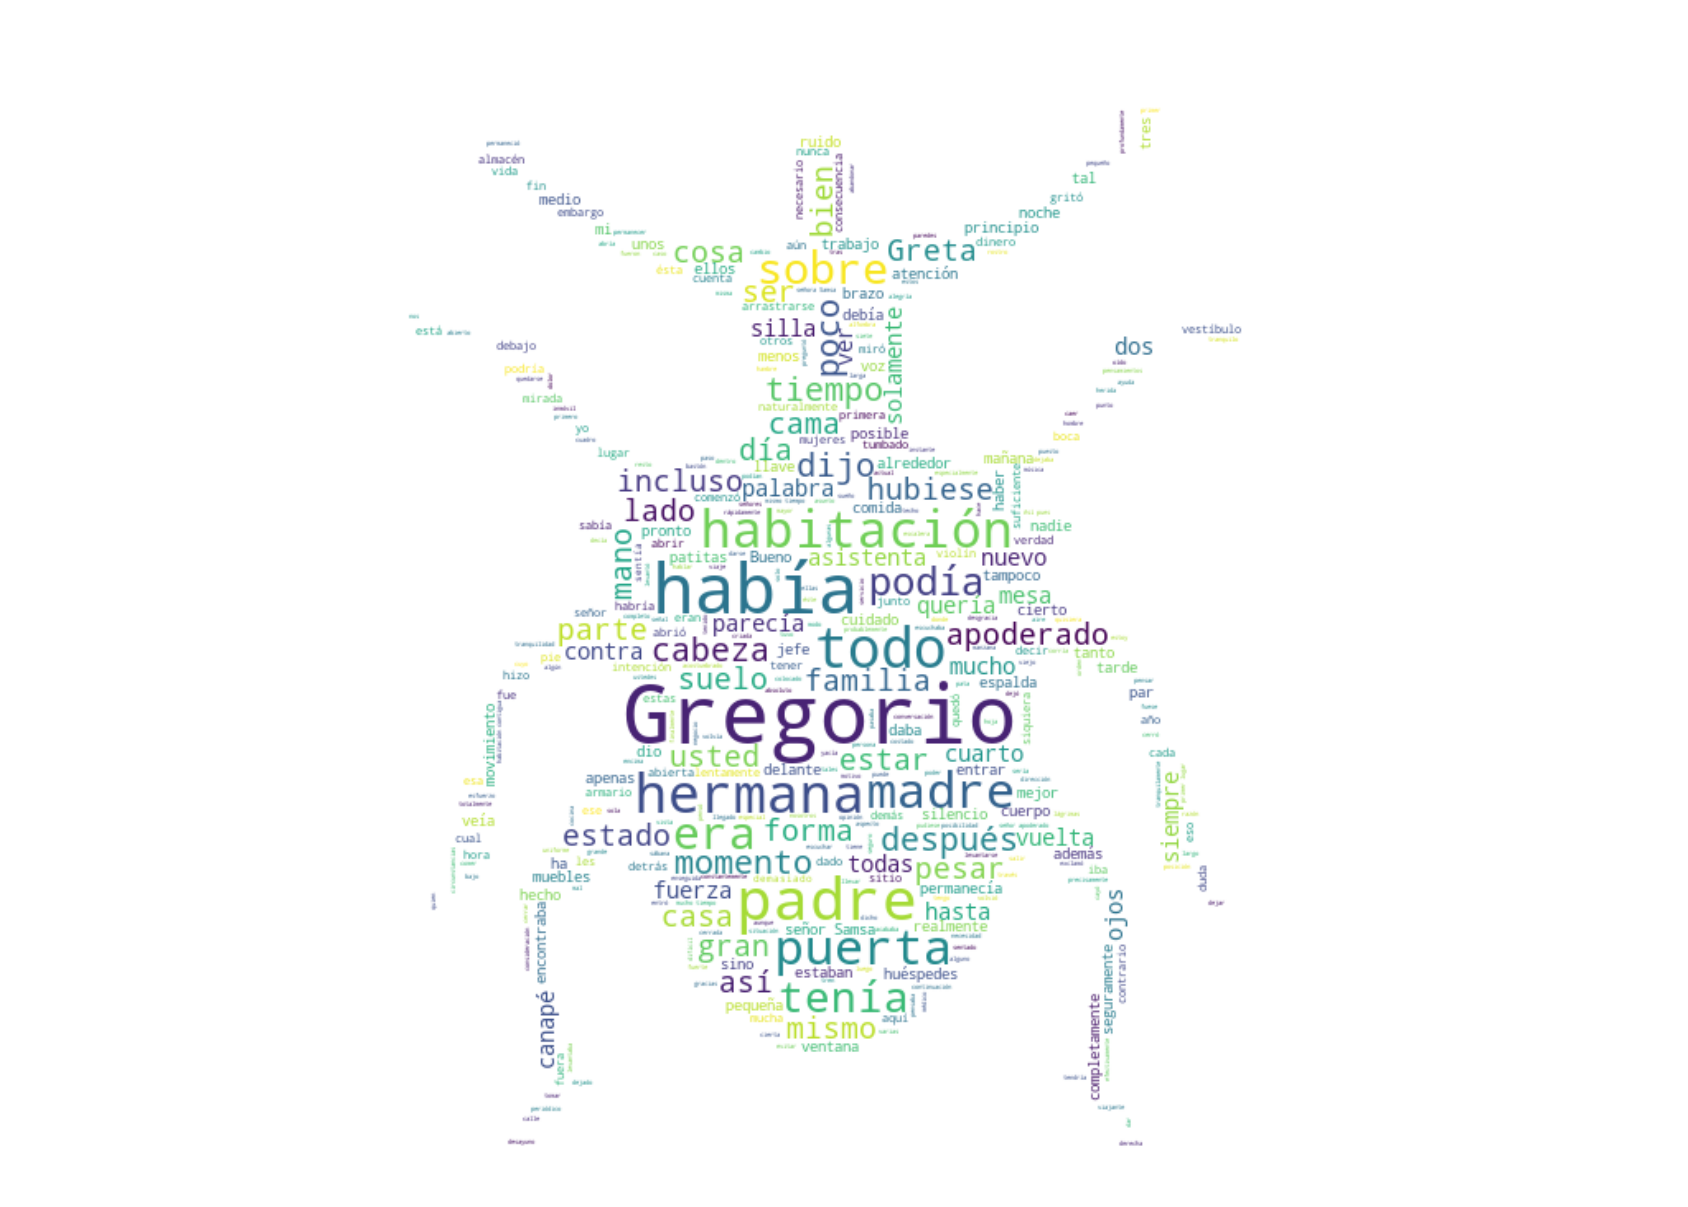

In [41]:
# instanciamos un objeto word cloud con inclusión de la máscara
Metamorfosis = WordCloud(background_color='white', max_words=2000, mask=Gregorio_mask, stopwords=stopwords)

# generamos la nube
Metamorfosis.generate(Metamorfosis_K)

# la desplegamos
fig = plt.figure()
fig.set_figwidth(30) # set width
fig.set_figheight(30) # set height

plt.imshow(Metamorfosis, interpolation='bilinear')
plt.axis('off')
plt.show()